## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

I will use the Pandas read_csv function to read in the dataset, save it in a variable: `df` and look at the first 3 rows to make sure the data is correctly loaded. 

In [2]:
df = pd.read_csv('ab_data.csv')

In [3]:
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


It seems that the data was read in without any column separation issues and the header looks finee.  

b. Use the cell below to find the number of rows in the dataset.

df.info() can tell us how many rows are there in the data set and also provide information about the column types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


As we can see from the RangeIndex: 294478 entries, that **there are 294478 number of rows in this dataset**. 

c. The number of unique users in the dataset.

To find the number of unique users, we first choose the `user_id` column, and chain it with .nunique().  

In [5]:
df.user_id.nunique()

290584

And we found **the number of unique users in the dataset is: 290584**.

d. The proportion of users converted.

Let's first see how the values in the 'converted' column are coded.

In [6]:
df.converted.unique()

array([0, 1])

Since the values in the `converted` column are coded as '0' (for 'not converted') and '1' (for 'converted'), we can take the mean of the `converted` column values to calculate the proportion of users converted as below.

In [7]:
np.mean(df.converted)

0.11965919355605512

Data shows that **the proportion of users converted is around 0.1197**.

e. The number of times the `new_page` and `treatment` don't match.

Then we will find all the rows which the `new_page` and `treatment` don't match which can occur in two separate ways. 

One is when the group is `treatment`, but the landing page is `old_page`. The other is when the group is `control`, but the landing page is `new_page`. 

We will calculate each type of these incidents and add them up as below: 

In [8]:
mis_match1 = df.query('group == "treatment"').query('landing_page == "old_page"')

In [9]:
mis_match2 = df.query('group == "control"').query('landing_page == "new_page"')

In [10]:
mis_match1.shape[0] + mis_match2.shape[0]

3893

Results showed **there are 3893 times the `new_page` and `treatment` don't match**.

f. Do any of the rows have missing values?

We can use isna() combined with any() and sum() on the dataframe to find out how many rows have missing values.

In [11]:
df.isna().any().sum()

0

And interestingly **0 rows have missing values!** 

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

We can drop these mismatch rows by index as below:

In [12]:
df2 = df.drop(mis_match1.index, axis = 0)
df2 = df2.drop(mis_match2.index, axis = 0)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

To get how many unique `user_id`s are in df2, we first select the `user_id` column, and chain it with .nunique() 

In [14]:
df2.user_id.nunique()

290584

**We found there is 290584 unique `user_id` in df2.**

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

**The dulicated `user_id` is df2 is 773192.**

c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

As we know the index of this dulicated row is: 2893, we can use it and drop the row by index. The `axis = 0` argument defines that we are dropping rows instead of columns. `inplace=True` will make the changes inplace.

In [17]:
df2.drop(2893, axis = 0, inplace=True)

Let's check if there is any duplicates in the `user_id` column after we drop the row.

In [18]:
df2.user_id.duplicated().any()

False

And it seems like we got rid of the duplicate. 

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

First, let's have a look at the first few rows of our dataframe `df2`. 

In [19]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


Then, we calculate the probability of an individual converting regardless of the page they receive by taking the mean of the `converted` column. 

In [20]:
np.mean(df2.converted)

0.11959708724499628

**Data shows that the converting rate is around 0.1195.**

b. Given that an individual was in the `control` group, what is the probability they converted?

First select the rows with the control group, then choose the `converted` column, and take the mean.

In [21]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

**So given that an individual was in the control group, the probability they converted is: 0.1203863045004612.**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

First select the rows with the treatment group, then choose the `converted` column, and take the mean.

In [22]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

**And we found given that an individual was in the treatment group, the probability they converted is: 0.11880806551510564.**

d. What is the probability that an individual received the new page?

The get the probability that an individual received the new page, we will need to find out how many individual received the new page, and divided it by the total number of individuals (or rows). 

In [23]:
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

**Data shows that the probability that an individual received the new page is: 0.5000619442226688.**

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**There is no sufficient evidence to conclude that the new treatment page leads to more conversions.** 

**First, the observed converted probability is actually lower in the 'treatment' group compared to the 'control' group.** 

**Second, without hypothesis testing, we could not draw conclusions that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**The null hypothesis H0 and alternative hypothesis H1 are as below:**

H0: **$p_{new}$** - **$p_{old}$** <= 0; 

H1: **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

Since we assume under the null hypothesis,  $p_{new}$  and  $p_{old}$  both have "true" success rates equal to the converted success rate regardless of page, and we assume they are equal to the converted rate in ab_data.csv regardless of the page,  $p_{new}$ and $p_{old}$ are calucated as below:

In [24]:
np.mean(df2.converted)

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

The **conversion rate** $p_{new}$ = $p_{old}$ = **0.11959708724499628** under the null.

c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
n_new = df2.query('group =="treatment"').shape[0]
n_new

145310

$n_{new}$, **the number of individuals in the treatment group is 145310.**

d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
n_old = df2.query('group =="control"').shape[0]
n_old

145274

$n_{old}$, **the number of individuals in the control group is 145274.**

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
sample_new = df2.query('group =="treatment"').sample(n_new, replace=True) 
new_page_converted= sample_new.converted 

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
sample_new2 = df2.query('group =="control"').sample(n_old, replace=True) 
old_page_converted= sample_new2.converted 

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

We take the mean of `new_page_converted` and `old_page_converted` to get the $p_{new}$ and $p_{old}$, and then calculate their difference by subtraction.

In [29]:
simulated_diff = (new_page_converted.mean() - old_page_converted.mean())
simulated_diff

-0.0016262856596261088

As we can see, **the difference between** $p_{new}$ and $p_{old}$ **for this one time simulation is: -0.0016815723008235528.**

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [30]:
p_diffs = []
for _ in range(10000):
    sample_new = df2.query('group =="treatment"').sample(n_new, replace=True) 
    new_page_converted= sample_new.converted.mean()
    sample_new2 = df2.query('group =="control"').sample(n_old, replace=True) 
    old_page_converted= sample_new2.converted.mean()
    p_diffs.append(new_page_converted - old_page_converted)

Convert the list p_diffs into a numpy array:

In [31]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

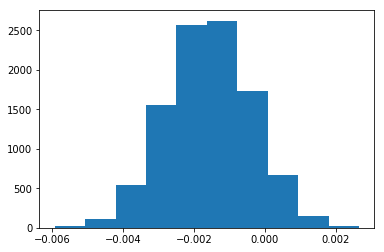

In [32]:
plt.hist(p_diffs); 

We see a normal distribution of the `p_diff` as expected as it follows the Central Limit Theorem. Here, a bootstrapped sample distribution of the mean differences in conversion rates between the new treatment group and control groups was calculated.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

First, we will calculate the actual difference in conversion rate observed in the ab_data.csv as below:

In [33]:
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
obs_diff

-0.0015782389853555567

We see that **the actual difference in conversion rate between the treatment and control group is: -0.0015782389853555567.**

Next, we will simulate a sample distribution of the `p_diffs` under the null hypothesis. 

We need to calculate the standard deviation of the `p_diffs` distribution first.

In [34]:
p_diffs_std = np.std(p_diffs)
p_diffs_std

0.0011965920555184529

Then, we simulate a sample distribution of the `p_diffs` under the null hypothesis as below:

In [35]:
null_val = np.random.normal(0, p_diffs_std, p_diffs.shape[0])

Let's plot this sample distribution of `p_diffs` under the null hypothesis using a histogram. Also, I'm plotting a gold color vertical line at the actual conversion rate difference observed in ab_data.csv as below:

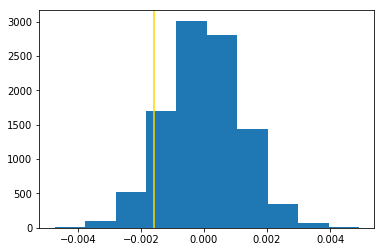

In [36]:
plt.hist(null_val)
plt.axvline(obs_diff, color = 'gold');

Then, we calculate the proportion of the p_diffs are greater than the actual difference observed in ab_data.csv

In [37]:
(null_val > obs_diff).mean()

0.90720000000000001

And data shows that **the proportion of the p_diffs are greater than the actual difference observed in ab_data.csv is: 0.90310000000000001.**

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**From part j, we calculated the probability of obtaining the observed mean differences in conversion rate under the null hypothesis. This value is called the P-value in scientific studies. In our case, the P-value is around 0.9031.  As we set our type I error rate alpha = 0.05, and the P-value is greater than 0.05, we fail to reject the null hypothesis. Therefore we do not have statistically significant evidence to suggest the new pages has higher conversion rates compared to the old pages.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').query('converted == 1').shape[0]
convert_new = df2.query('group == "treatment"').query('converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In order to use the statsmodel proportions z-test, we first need to create two numpy arrays: `count` for the number of sucessful events, in our case the new page and old page conversion rate counts. And `nob` for the total number of events, which are the `n_new` and `n_old`. 

In [40]:
count = np.array([convert_new, convert_old])
nob = np.array([n_new, n_old])

Then, we conduct the z-test with the appropriate arguments. 

`value = 0` indicates the null hypothesis: $p_{new}$ - $p_{old}$ = 0. 

`alternative='larger'` defines our alternative hypothesis of $p_{new}$ > $p_{old}$ (One sided test). 

The test results will return the z-score and the p-value, which we save in the two variables `z_stat`, `p_val`. 

In [41]:
z_stat, p_val = sm.stats.proportions_ztest(count, nob, value = 0, alternative='larger')

In [42]:
'{0:0.3f}'.format(z_stat), '{0:0.3f}'.format(p_val) 

('-1.311', '0.905')

The result shows the z-score of this hypothesis test is: -1.311, and the p-value is: 0.905. 

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

By looking at the z-score table, we found that at the alpha = 0.05 level, the cut off z-score for the rejection region is: 1.64. Therefore, if our obtained z-score is greater than 1.64, we reject the null hypothesis. 

However, our z-score is: -1.311, so it does NOT fall within the rejection region. And therefore we DO NOT reject the null hypothesis.

The p-value of 0.905 also indicates there is a ~90% chance the difference in conversion rates comes from the null hypothesis, so we DO NOT reject the null hypothesis.

The findings are consistant with parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since the goal is to predict two possible outcomes, we should perform logistic regression. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

First, let's have a quick look at what the first few rows of df2 dataframe looks like.

In [43]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


Then we create a new 'intercept' column as below.

In [44]:
df2['intercept'] = 1

Next, we use the pd.getdummies() function to create dummy variables using the 'group' column from df2 dataframe.
As we wanted to create an `ab_page` column which is 1 when an individual receives the treatment and 0 if control, the `ab_page` column would be the `treatment` column returned from the pd.getdummies() function. Therefore, we could create the `ab_page` column as below:

In [45]:
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])

Now, let's check the first few rows of df2 dataframe again to see the columns we created. 

As you can see, both the `intercept` and `ab_page` column was sucessfully created and we can proceed to instantiating our regression model. 

In [46]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [47]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

Fitting the logistic model as below.

In [48]:
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        11:55:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**The p-value associated with ab_page is: 0.190 which is greater than the alpha level of 0.05. In this case, we do not reject the null hypothesis: There are no significant difference in conversion rates based on which page a customer receives (new page vs old page). The p-value here is different from the part II analysis because the null hypothesis in part II is not the same as here. The null hypotheisis in the part II is: The conversion rate for the new page is the same or even worse compared to the old page.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**As we found the page layout didn't help to influence whether or not an individual converts, it might be a good idea to consider other factors affecting the conversion rate. One disadvantage of adding additional terms into the regression model is introduing possible multicollinearity. If our independent variables in the regression model are correlated, then the model won't be able to correctly predict the results.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

First, let's read in the `countries.csv` and save it into a dataframe `df3`. 

In [50]:
df3 = pd.read_csv('countries.csv')

Then, we look at the first two rows of the dataset to see if we loaded the data correctly. 

In [51]:
df3.head(2)

,user_id,country
0,834778,UK
1,928468,US


Everything looks good. Now it's time to join dataframe `df3` with `df2` on the `user_id` column as below.

We will save the new dataframe as `df4`. Before we join, let's look at the shape of the two dataframes to be joined.

In [52]:
df2.shape, df3.shape

((290584, 8), (290584, 2))

It seems that both dataframe `df2` and `df3` have same number of rows, and `df2` has 8 columns while `df3` has 2 columns.

An inner join would be appropriate as we are interested in finding the user_id which has both the country and conversion rate info.

In [53]:
df4 = df2.join(df3.set_index('user_id'), how='inner', on='user_id')

Let's double check to see if our dataframe merge is sucessful. 

In [54]:
df4.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US


We see the country columns has been added to the merged dataframe. 

For the first record, we see that the user_id: 851104 comes from thr country `US`. 

Let's query the `df3` dataframe and see if this is the case.

In [55]:
df3.query('user_id == 851104')

,user_id,country
172334,851104,US


And indeed, it was true. This also indicates the join between `df2` and `df3` was sucessful. 

In [56]:
df4.shape

(290584, 9)

Looking at the shape of `df4` dataframe, we see that all of the rows matched and we did add one more column `country` into the dataframe. 

Next, let's see which countries the students come from.

In [57]:
df4.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

Results shows that the students come from 'US', 'CA' or 'UK'. 

For our logistic regression model to include the country, we will need to create dummy variables as before.

In [58]:
df4[['CA', 'UK', 'US']] = pd.get_dummies(df4['country'])

A quick check of the last 5 records of `df4` to confirm our dummy variables were created correctly. 

In [59]:
df4.tail()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,1,0,US,0,0,1
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,1,0,US,0,0,1
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,1,0,US,0,0,1
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,1,0,US,0,0,1
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,0,1,UK,0,1,0


Next step is to instantiate the logistic regression model, fit the model and create the summary of the results. 

In [60]:
logit_mod2 = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'US', 'CA']])

In [61]:
results2 = logit_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [62]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 30 Jul 2019   Pseudo R-squ.:               2.323e-05
Time:                        11:55:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
==============================================================================
"""

We can see that the p-value associated with `ab_page` is: 0.191, the p-value associated with country `US` is: 0.457, the p-value associated with country `CA` is: 0.074. All of which is greater than the alpha level of 0.05. In this case, we do not reject the null hypothesis: There are no significant difference in conversion rates based on which page a customer receives (new page vs old page), and no significant difference in conversion rates based on which country they come from. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

First, we will create two new columns by multiplying the `ab_page` column and `US`, `CA` column as below:

In [63]:
df4['ab_page_US'] = df4['ab_page'] * df4['US']

In [64]:
df4['ab_page_CA'] = df4['ab_page'] * df4['CA']

In [65]:
df4.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US,ab_page_US,ab_page_CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1,1,0


Then, we instantiate the logistic regression model, fit the model and create the summary of the results. 

In [66]:
logit_mod3 = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'US', 'CA', 'ab_page_US', 'ab_page_CA']])

In [67]:
results3 = logit_mod3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [68]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 30 Jul 2019   Pseudo R-squ.:               3.482e-05
Time:                        11:55:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
US             0.0057      0.019      0.306      0.760      -0.031       0.043
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
ab_page_US    -0.0314      0.027     -1.181      0.238      -0.084       0.021
ab_page_CA    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==============================================================================
"""

**As we can see, the p-value for `ab_page`: 0.635, p-value for `US`: 0.760, p-value for `CA`: 0.767, p-value for `ab_page_US`: 0.238, p-value for `ab_page_CA`: 0.168, all of them > the alpha level of 0.05. Therefore, there are no significant difference in conversion rates based on which page a customer receives (new page vs old page). There are no significant difference in conversion rates based on where the students come from. And there are no significant difference in conversion rates based on the page layout and country interaction.** 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [69]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0